#### 1. โหลดข้อมูลตัวอย่างจากไฟล์ csv โดยใช้ pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('datasets/salary_food.csv')

df

,income,food_expenses
0,16,52
1,20,60
2,12,50
3,14,52
4,14,50
5,15,48
6,12,48
7,10,46
8,10,48
9,12,50


#### 2. ตรวจสอบการกระจายของข้อมูลด้วยการพล็อตกราฟ Scatter plot

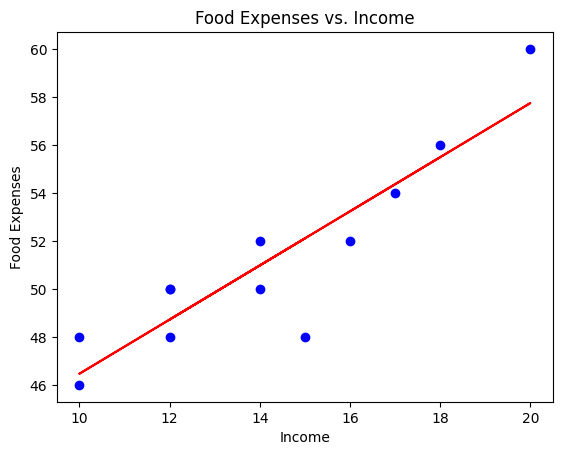

In [13]:
# Scatter plot
plt.scatter(df['income'], df['food_expenses'], color='blue')

# หาความชัน (slope)
m, b = np.polyfit(df['income'], df['food_expenses'], 1)

# สร้างเส้นตรง
plt.plot(df['income'], m*df['income'] + b, color='red')
plt.title('Food Expenses vs. Income')
plt.xlabel('Income')
plt.ylabel('Food Expenses')
plt.show()

#### 3. แบ่งข้อมูลเป็นชุดข้อมูลสำหรับการฝึก (train) และทดสอบ (test) โมเดล

In [22]:
# x, y for simple linear regression
x = df[['income']] # ตัวแปรอิสระต้องเป็น 2D array
y = df['food_expenses'] # ตัวแปรตาม ต้องเป็น 1D array

# แบ่งข้อมูลเป็น train กับ test
x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[16]
 [20]
 [12]
 [14]
 [14]
 [15]
 [12]
 [10]
 [10]
 [12]]
[52 60 50 52 50 48 48 46 48 50]
[[17]
 [18]]
[54 56]


#### 4. สอน Model (Traing Model) โดยใช้ Linear Regression

In [23]:
# สร้าง model object linear regression
model = LinearRegression()

# สอนโมเดล (fit the model)
model.fit(x_train, y_train)

LinearRegression()

#### 5. การทำนาย (Prediction) โดยใช้ข้อมูลทดสอบ (Test Data)

In [24]:
# ตัวอย่างการทำนายผล
print("Prediction:", model.predict(x_test))

Prediction: [54.3030303  55.41818182]


#### 6. การประเมินผลลัพธ์ของ Model (Model Evaluation)

In [28]:
# ดูค่า coefficient และ intercept
print("Coefficient:", model.coef_) # ค่า coefficient  #b 
print("Intercept:", model.intercept_) # ค่า intercept  #a

# ดูค่าความแม่นยำของโมเดล โดยใช้ค่า R-squared
# R-Square ของการทำนาย มีค่าตั้งแต่ 0.1 - 1 (x100) ค่าที่ใกล้ 1 คือ การทำนายที่ดี
print("R-Squared:", model.score(x_test, y_test)) # ค่า R-squared ของการทำนาย
print("ความแม่นยำ %.2f%%" % (model.score(x_test, y_test) * 100))

Coefficient: [1.11515152]
Intercept: 35.345454545454544
R-Squared: 0.7848301193755732
ความแม่นยำ 78.48%


#### 7. บันทึก Model เพื่อนำไปใช้งาน (Model Export)

In [ ]:
# ติดตั้ง library สำหรับการ export model ชื่อว่า joblib
! pip install joblib

from joblib import dump

# บันทึกโมเดล ไว้ในไฟล์ชื่อ model.joblib
dump(model, 'salary_food_model.joblib')

#### 8. โหลด Model ที่บันทึกไว้เพื่อนำไปใช้งาน

In [32]:
from joblib import load

# โหลดโมเดลจากไฟล์ชื่อ salary_food_model.joblib
myModel = load('salary_food_model.joblib')

# ทดสอบการทำนาย
print("Prediction:", myModel.predict([[17],[18],[30],[60]]))

Prediction: [ 54.3030303   55.41818182  68.8        102.25454545]
